In [ ]:
## Proje 1: CNN ile Görüntü Sınıflandırma (Mouse vs Havya)
#İsmail
#AYKURT
#2212721061
#

In [1]:
# --- ADIM 6 (Tekrar): Kütüphaneler ve Drive Bağlantısı ---
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers # Öğrenme oranını (Adam) ayarlamak için
import matplotlib.pyplot as plt
import numpy as np
import os

# Google Drive'ı Colab'a bağlama
from google.colab import drive
drive.mount('/content/drive')


# --- ADIM 7 (Tekrar): Veri Yolları ve Hiperparametreler ---
base_dir = '/content/drive/MyDrive/Colab Notebooks/MasaObjeleri/dataset'
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)
EPOCHS = 25 # Daha iyi öğrenmesi için epoch sayısını biraz artırabiliriz (Deney 1)

# --- model3 HİPERPARAMETRELERİ (Deney 1) ---
# Föyünüz en az 3 değişiklik istiyor.
# 1. Batch size (model2'de 32 idi)
BATCH_SIZE = 64 # Değişiklik 1: Batch size'ı artırdık (32 -> 64)
# 2. Öğrenme Oranı (model2'de default 'adam' idi)
LEARNING_RATE = 0.0005 # Değişiklik 2: Öğrenme oranını yavaşlattık (0.001 -> 0.0005)


# --- ADIM 8 (Değiştirilmiş): VERİ ARTIRIMI (Augmentation) ---

# 1. EĞİTİM Verisi için Veri Artırımı (Föyün istediği Adım 2.2)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, # Föy 15 istedi, 20 yapalım
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, # Yatayda çevir
    validation_split=0.2 # %20 ayırmayı unutma
)

# 2. DOĞRULAMA Verisi için (SADECE NORMALİZASYON)
# ÖNEMLİ: Doğrulama verisine ASLA artırım uygulanmaz.
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# 3. Eğitim verilerini yükle (train_datagen'den)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, # Yeni BATCH_SIZE (64)
    class_mode='binary',
    subset='training'
)

# 4. Doğrulama verilerini yükle (validation_datagen'den)
validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE, # Yeni BATCH_SIZE (64)
    class_mode='binary',
    subset='validation'
)

Mounted at /content/drive
Found 86 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [3]:
# Model 3: Model 2'nin Geliştirilmiş Hali (Dropout Eklendi)

model3 = Sequential([
    layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 3)),

    # Blok 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Blok 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Blok 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Sınıflandırma Katmanları
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # --- YENİ DEĞİŞİKLİK (DEĞİŞİKLİK 3) ---
    # Model 2'deki kararsızlığı (overfitting) çözmek için Dropout eklendi
    layers.Dropout(0.4), # Nöronların %40'ını rastgele kapat
    # --- Bitiş ---

    layers.Dense(1, activation='sigmoid')
])

# --- DERLEME (YENİ ÖĞRENME ORANI İLE) ---

# Adım 20'de belirlediğimiz LEARNING_RATE'i (0.0005) burada kullanıyoruz
model3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), # Değişiklik 2
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Model 3'ün özetini gör
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Model 3'ü eğitmeye başla!

# model3.fit -> modeli eğit
# train_generator -> 86 resimlik AMA ARTTIRILMIŞ (AUGMENTED) eğitim verisi
# epochs=EPOCHS -> 25 "tur" (Adım 20'de 25 belirlemiştik)
# validation_data=validation_generator -> 20 resimlik (ARTIRILMAMIŞ) doğrulama verisi

history_model3 = model3.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5455 - loss: 0.6830 - val_accuracy: 0.5000 - val_loss: 0.8804
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4688 - loss: 0.9448 - val_accuracy: 0.5000 - val_loss: 0.6698
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6977 - val_accuracy: 0.5000 - val_loss: 0.7586
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4844 - loss: 0.8125 - val_accuracy: 0.5000 - val_loss: 0.6857
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.4545 - loss: 0.7199 - val_accuracy: 1.0000 - val_loss: 0.6459
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6406 - loss: 0.6541 - val_accuracy: 0.7000 - val_loss: 0.6356
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7273 - loss: 0.6274 - val_accuracy: 0.5500 - val_loss: 0.6306
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5781 - loss: 0.6520 - val_accuracy: 0.5500 - val_loss: 0.6221
Epoch 9/25
1/1

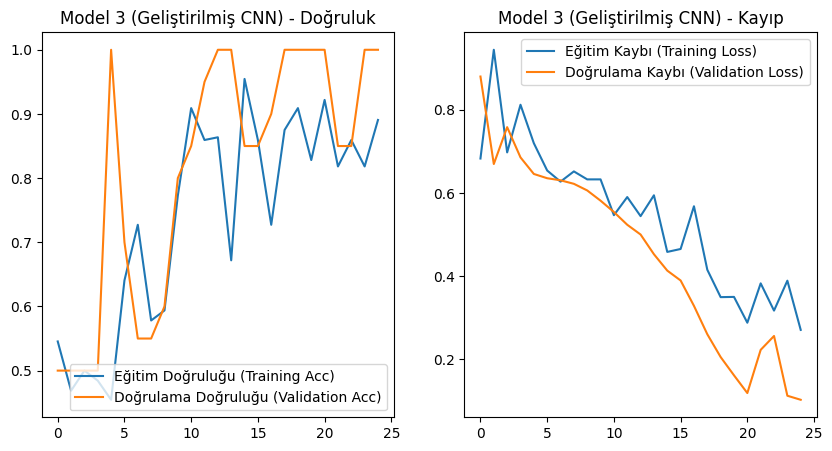


--- Model 3 Raporu ---
Model 3'ün son (Test/Doğrulama) doğruluğu: %100.00


In [5]:
# Eğitim sonuçlarını (history_model3) al
acc = history_model3.history['accuracy']
val_acc = history_model3.history['val_accuracy']
loss = history_model3.history['loss']
val_loss = history_model3.history['val_loss']

# Epoch sayısını 25 (veya history'den) al
epochs_range = range(len(acc))

# 1. Grafik: Eğitim ve Doğrulama DOĞRULUK Grafiği
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Eğitim Doğruluğu (Training Acc)')
plt.plot(epochs_range, val_acc, label='Doğrulama Doğruluğu (Validation Acc)')
plt.legend(loc='lower right')
plt.title('Model 3 (Geliştirilmiş CNN) - Doğruluk')

# 2. Grafik: Eğitim ve Doğrulama KAYIP Grafiği
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Eğitim Kaybı (Training Loss)')
plt.plot(epochs_range, val_loss, label='Doğrulama Kaybı (Validation Loss)')
plt.legend(loc='upper right')
plt.title('Model 3 (Geliştirilmiş CNN) - Kayıp')
plt.show()

# Test (Doğrulama) Seti Sonucunu Raporla
print("\n--- Model 3 Raporu ---")
final_val_accuracy = val_acc[-1] # Listenin son elemanı
print(f"Model 3'ün son (Test/Doğrulama) doğruluğu: %{final_val_accuracy * 100:.2f}")